## Docker:
A container runtime environment and file format that helps developers build, deploy, and run containers. Docker is a popular tool for creating containers.

- SW development platform to deploy apps
- Apps are packed in containers that can run on any OS
- Containers are lightweight and portable
- Apps runs the same across different OS platform
- microservice architecture

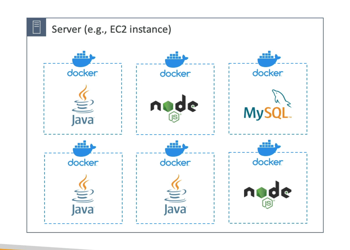

In [2]:
from PIL import Image 
from IPython.display import display

img = Image.open('docker.jpeg')
new_image = img.resize((350, 250))
display(new_image)

### Docker vs Virtual Machine:
- Both are virtualization technology


#### Virtual Machines
- VMs have a guest operating system (OS) inside each VM
- used for static applications
- hypervisor
    - used to manage the underlying hardware 
- VMs boot up slower than Docker containers
- VMs use more memory than Docker containers


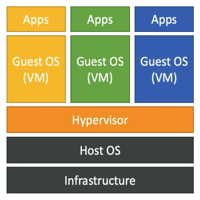

In [6]:
from PIL import Image 
from IPython.display import display

img = Image.open('vms.jpeg')
new_image = img.resize((200, 200))
display(new_image)

#### Dockers:
- Docker containers share a host OS across multiple containers
- used for more dynamic tasks
- docker engine
- Docker file: configuration file
- Docker images: the docker file after its build
- Docker repositories: docker images stored in a repository (dockerhub)
- Docker containers: the docker images when run/executed
- Docker containers boot up faster than VMs
- Docker containers use less memory than VMs

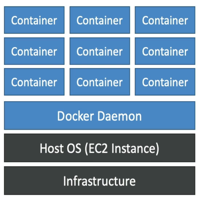

In [7]:
from PIL import Image 
from IPython.display import display

img = Image.open('dockers.jpeg')
new_image = img.resize((200, 200))
display(new_image)

#### How Docker works:

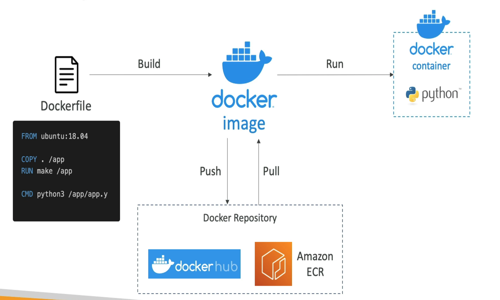

In [5]:
from PIL import Image 
from IPython.display import display

img = Image.open('dockerswork.jpeg')
new_image = img.resize((500, 300))
display(new_image)

#### Docker container management service on AWS:
- ECS (Elastic Container Service)
    - Amazon's own container service

- EKS (Elastic Kubernetes Service)
    - Amazon's managed kubernetes
    - Kubernetes: An orchestration tool that controls how and where containers run. Kubernetes is the most popular tool for container orchestration in production

- ECR (Elastic Container Repository)
    - Amazon's container registry
    
- AWS Fargate 
    - serverless container platform
    - works with both ECS and EKS

### Amazon ECS - EC2 Launch Type:
- When launching ECS docker container service on AWS
    - we launch ECS tasks on ECS cluster
- create task definitions to run ECS tasks
- we must provision and maintain the EC2 instances
- To register the EC2 instances in ECS Cluster, each instance should have ECS Agent setup inside them
- AWS takes care of starting and stopping the EC2 instances

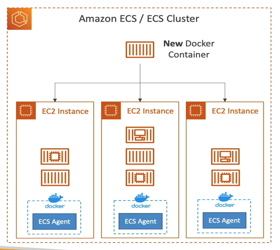

In [11]:
from PIL import Image 
from IPython.display import display

img = Image.open('launchtype.jpeg')
new_image = img.resize((280, 250))
display(new_image)

### Amazon ECS - Fargate Launch Type:
- No EC2 instance to manage
- Serverless
- create task definitions to run ECS tasks

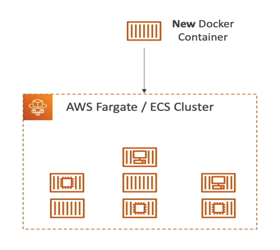

In [12]:
from PIL import Image 
from IPython.display import display

img = Image.open('fargatetype.jpeg')
new_image = img.resize((280, 250))
display(new_image)

### IAM Roles for ECS:
EC2 instance profile (for EC2 launch type):
- used by ECS agent 
- makes API calls to ECS
- send container logs to Cloudwatch
- pull docker images from ECR
- reference sensitive data from AWS secrets manager or SSM parameter store

ECS Task Role:
- Allows each task to have a role
- its defined in task definition

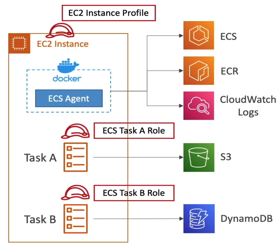

In [13]:
from PIL import Image 
from IPython.display import display

img = Image.open('iamroles.jpeg')
new_image = img.resize((280, 250))
display(new_image)

### ECS - Load balancer integration:
- Application Load balancer works for most cases
- Network Load balancer is more suitable for high traffic (throughput/performance) and low latency scenarios or pair it with AWS Private Link


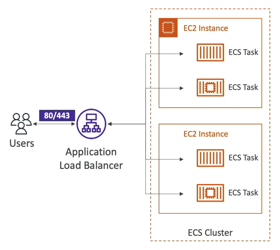

In [14]:
from PIL import Image 
from IPython.display import display

img = Image.open('alb.jpeg')
new_image = img.resize((280, 250))
display(new_image)

### ECS - Data Volumes (EFS):
- EFS mounted on ECS tasks
- Tasks running on any AZs will share same data on the EFS mounted
- works for both EC2 & Fargate Launch type

Note:
- S3 cannot be mounted as a File System since its a object storage

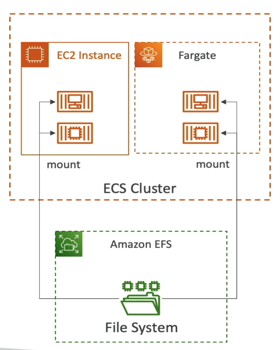

In [17]:
from PIL import Image 
from IPython.display import display

img = Image.open('efs.jpeg')
new_image = img.resize((280, 350))
display(new_image)

### Setup ECS Cluster:
- Go to ECS console, go to the clusters option (right-side)
- cluster name
- infrastructure
    - AWS Fargate
    - EC2 instances
        - ASG
        - OS
        - EC2 instance type
        - desired capacity
        - SSH key pair
        - Root EBS volume
        - Network Settings 
            - VPC
            - subnets
            - security groups
            - auto assign public IP
    - External instances using ECS
- monitoring
- tags
- create

#### Check ASG created in ECS:
- Go to EC2 console
    - Go to ASG option on the right side
    - We can modify the instance capacity and the will be reflected in ECS Cluster
        - Go to instance management under ASG to modify
        - Go to ECS cluster created and go to infrastructure tab to see the modified ASG instances
            - Go to container instances


#### Check the ECS cluster created:
- Go inside the ECS cluster created
- Look at the options available inside ECS cluster
    - Service
    - Tasks
    - Infrastructure
        - capacity providers
            - Fargate & Fargate_SPOT (when Fargate launch type included in ECS cluster)
            - ASG group detail
        - container instances
    - Metrics
    - Tags

### Setup Task Definition - ECS:
- In ECS, Go to Task Definition (left-side option)
    - Create Task Definition
        - Task definition family name
        - Infrastructure
            - Launch type
                - AWS Fargate
                    - OS
                    - network mode (unmodifiable)
                    - task size
                    - task roles
                - EC2 instances
                    - same options as above except network mode which can modified
                    - network mode
                        - awsvpc
                        - bridge
                        - default
                        - host
                        - none
        - Container details (if container set to "essential container" then if task is stopped/killed the ECS container service will be stopped)
            - name
            - image url
            - private registry (store credentials in AWS secrets Manager to reference images in private registry/repository)
            - port mappings
                - port
                - protocol
                - name
                - app protocol
                - we can add more port mappings
            - read only root file system
            - resource allocation limits
                - CPU
                - GPU
                - memory soft limits
                - memory hard limits (if memory exceeds hard limits in a container then the container is terminated/stopped)
            - environmental variables
                - key
                - value type
                    - value
                    - value from (for both SSM parameter store and Secrets manager)
                - value
                    - add value
                    - add ARN value (for value from option in value type)
            - logging
                - logging service to choose (cloudwatch, splunk, (Firehose, Kinesis, OpenSearch, S3, custom destinations via FireLens), etc 
                - Cloudwatch (natively)
                    - Key
                    - Value
                    - Value type
            - restart policy
                - reset period
            - health check
                - command
                - interval
                - start period
                - timeout
                - retries
            - startup dependency ordering
                - to order the containers startup in order one after the other
            - container timeouts
                - start timeout
                - stop timeout
            - container network settings
                - in-configurable if network mode (awsvpc)
            - docker configuration
                - entry point
                - command
                - working directory
            - resource limits
                - name
                - soft limit
                - hard limit
            - docker labels
                - key-value pairs
        - Storage 
            - add volumes
                - name
                - configure at task definition creation
                    - volume type
                        - Bind mount
                        - EFS
                        - docker volume
                        - FSx (Windows File Server)
                    - source path
                - configure at deployment
            - volume from (storage/file system from other container)
                - container
                - source container
                - read only
        - Monitoring
            - trace collection
                - creates AWS Distro for Open Telemetry sidecar to route traces from application to AWS X-Ray
            - metric collection
                - creates AWS Distro for Open Telemetry sidecar to route custom container and application metrics to cloudwatch or Amazon Managed Service for Prometheus
        - Tags
    - Create task definition using JSON
    - Create

#### Setup ECS Service
- Go to the ECS cluster created and under Service tab 
- Create Service
    - Existing cluster
    - compute options
        - capacity provider strategy
            - use cluster default
                - capacity provider
                - base
                - weight
            - use custom
        - launch type
            - FARGATE
            - EC2 instance
            - External
    - deployment configuration
        - application type
            - service (group of tasks)
            - task (standalone task - batch job)
        - task definition   
            - family name
            - revision
            - service name
            - service type
                - Replica (place and maintain a desired number of task across cluster)
                - Daemon (place and maintain one copy of your task on each container instance)
        - desired tasks
        - deployment options
            - deployment type
                - rolling update
            - min tasks running (%)
            - max tasks running (%)
        - deployment failure detection
            - ECS circuit breaker (if service cant reach a steady state because a task failed to launch, the deployment also fails)
                - rollback on failures
            - use cloudwatch alarms
    - service connect
    - service discovery (uses Route53 to create namespace for your service, which allows it to be discoverable via DNS)
    - Networking
        - vpc
        - subnets
        - security group
        - public IP
    - Load balancing
        - Load balancer type
        - name
        - health checks grace period
        - select container
        - listener
            - port
            - protocol
        - target group
            - name
            - protocol
            - health checks path 
            - health checks protocol
    - service auto scaling
    - task placement
    - tags

#### Update ECS Service - update ECS tasks:
- Under created ECS service,
    - click update service
        - modify the number of tasks field

### ECS Auto Scaling:
- Increase/decrease the number of tasks
- AWS application auto scaling
- Target tracking: scale based on a target value of a specific cloudwatch metric
- step scaling:
- scheduled scaling:
- EC2 auto scaling is not as ECS auto scaling. Therefore Fargate is easy to setup


#### ECS - EC2 Launch Type - Auto Scaling
- Auto Scaling Groups
- ECS Cluster capacity provider

#### Auto Scaling Groups:

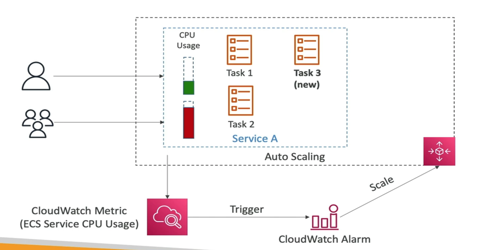

In [18]:
from PIL import Image 
from IPython.display import display

img = Image.open('asg.jpeg')
new_image = img.resize((480, 250))
display(new_image)

#### ECS Cluster capacity provider:

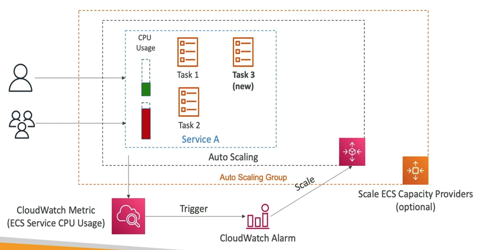

In [19]:
from PIL import Image 
from IPython.display import display

img = Image.open('ccp.jpeg')
new_image = img.resize((480, 250))
display(new_image)

#### ECS - Rolling Updates:
- when updating ECS from version 1 to version 2, we can control how many tasks can be started ans stopped and in which order

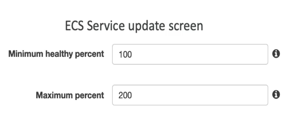

In [29]:
from PIL import Image 
from IPython.display import display

img = Image.open('rollingupdate2.jpeg')
new_image = img.resize((300, 130))
display(new_image)

Example ECS service is running 9 tasks, so these 9 tasks contribute to actual running capacity

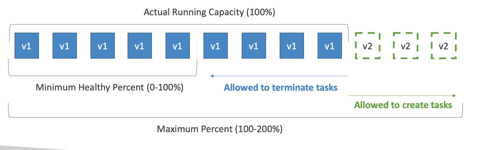

In [21]:
from PIL import Image 
from IPython.display import display

img = Image.open('rollingupdate.jpeg')
new_image = img.resize((480, 150))
display(new_image)

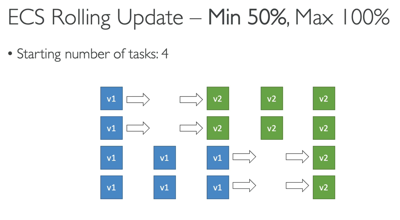

In [79]:
from PIL import Image 
from IPython.display import display

img = Image.open('rollingupdate3.jpeg')
new_image = img.resize((400, 220))
display(new_image)

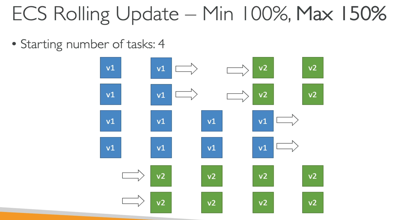

In [80]:
from PIL import Image 
from IPython.display import display

img = Image.open('rollingupdate4.jpeg')
new_image = img.resize((400, 220))
display(new_image)

#### ECS - Solution Architectures:
Event Bridge:

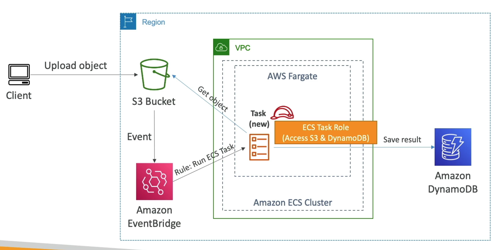

In [76]:
from PIL import Image 
from IPython.display import display

img = Image.open('eventbridge.jpeg')
new_image = img.resize((500, 250))
display(new_image)

Procedure:
- Client upload object into S3
- Once the object (image) is uploaded into S3 bucket, the eventbridge notifies the ECS tasks (serverless using AWS Fargate)
- The ECS service will perform copying or modifying an uploaded image in S3 bucket and then store it in dynamoDB

Event Bridge Schedule:

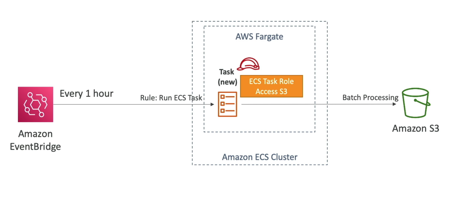

In [74]:
from PIL import Image 
from IPython.display import display

img = Image.open('eventbridge1.jpeg')
new_image = img.resize((450, 200))
display(new_image)

SQS Queue:

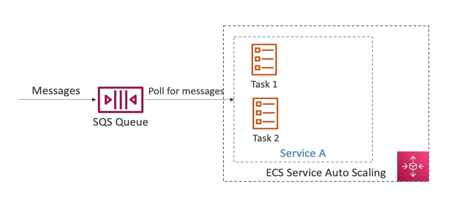

In [73]:
from PIL import Image 
from IPython.display import display

img = Image.open('sqs.jpeg')
new_image = img.resize((450, 200))
display(new_image)

Intercept stopped tasks using Eventbridge:

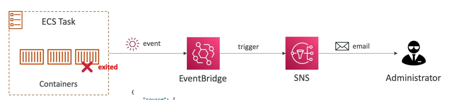

In [68]:
from PIL import Image 
from IPython.display import display

img = Image.open('intercept.jpeg')
new_image = img.resize((450, 100))
display(new_image)

ECS task change status:

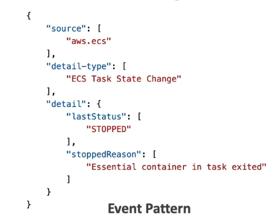

In [81]:
from PIL import Image 
from IPython.display import display

img = Image.open('policy.jpeg')
new_image = img.resize((280, 220))
display(new_image)

#### ECS - Task Definition:
- Task definition are metadata in JSON form to tell ECS how to run docker container
- Task definition contains,
    - image name
    - port binding for container and host (EC2)
    - memory & cpu required
    - IAM role
    - environment variables
    - Networking information
    - logging configuration
- can define 10 containers per task definition

#### ECS Task Definition - EC2 Launch type with Apache server

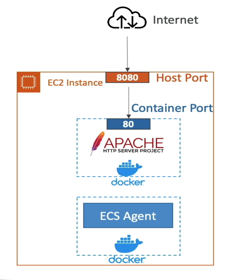

In [64]:
from PIL import Image 
from IPython.display import display

img = Image.open('taskdefinition.jpeg')
new_image = img.resize((230, 280))
display(new_image)

#### ECS Task Definition - EC2 Launch Type (Load Balancing):
- We get Dynamic Host Port Mapping if we define only the container port in task definition
- ALB finds the right port on the EC2 instances
- must allows traffic on the EC2 instance security groups from any port of ALB security group

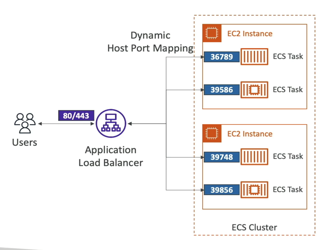

In [62]:
from PIL import Image 
from IPython.display import display

img = Image.open('dynamichostmapping.jpeg')
new_image = img.resize((330, 250))
display(new_image)

#### ECS Task Definition - Fargate Launch Type (Load Balancing):
- Each task has a private IP
- only define the container port since its serverless (host port only on EC2 instances - EC2 Launch type)
- ECS ENI Security Group allow all traffic on port 80 from ALB & ALB SEcurity Group allow all traffic on port 80/443 from the web

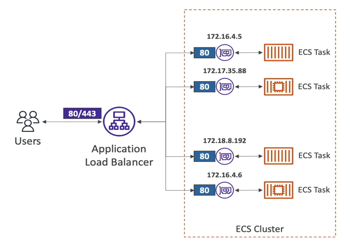

In [60]:
from PIL import Image 
from IPython.display import display

img = Image.open('fargatelaunchtype.jpeg')
new_image = img.resize((350, 250))
display(new_image)

#### ECS Task Definition - IAM Roles:

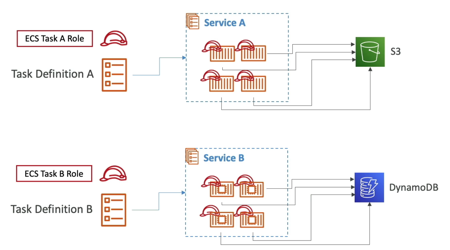

In [59]:
from PIL import Image 
from IPython.display import display

img = Image.open('iamroles1.jpeg')
new_image = img.resize((450, 250))
display(new_image)

#### ECS Task Definition - Environment Variables:
- Hardcoded: e.g., URLS
- SSM parameters (API Keys, Shared Configs)
- Secrets manager (DB passwords)
- Load ECS environment variable files (bulk) from S3

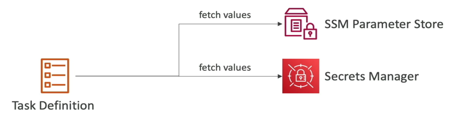

In [58]:
from PIL import Image 
from IPython.display import display

img = Image.open('env.jpeg')
new_image = img.resize((450, 120))
display(new_image)

#### ECS Task Definition - Data Volumes:

Bind Mounts:
- share data between multiple containers in same task definition
- works for both AWS Fargate and EC2 Launch Type
    - EC2 Launch Type
        - using EC2 instance storage
        - data is tied to lifecycle of EC2 instance
        - data is lost when instance is terminated
    - AWS Fargate
        - using ephemeral storage
        - Data tied to the containers using them
        - storage 20 - 200 GB

Usecase:
- share data between container
- side car (to send metrics and logs to another destination)

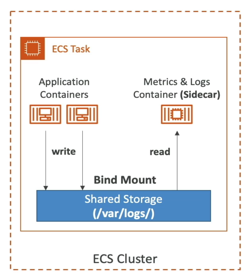

In [57]:
from PIL import Image 
from IPython.display import display

img = Image.open('bind.jpeg')
new_image = img.resize((250, 280))
display(new_image)

### ECS Tasks Placements:
- when a task of EC2 launch type is launched, ECS must determine where to place it, with the constraints of CPU, memory and available port.
- When a service scales in, ECS needs to determine which task to terminate
- Assign task placement strategy and task placement constraints
- Only applicable for EC2 Launch type

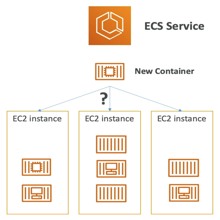

In [84]:
from PIL import Image 
from IPython.display import display

img = Image.open('strategy.jpeg')
new_image = img.resize((220, 220))
display(new_image)

#### Task Placement Process:
- When ECS places tasks, it uses the following process to choose the container instance
    - CPU, memory, port requirements in task definition
    - task placement constraints
    - task placement strategies

##### Task placement strategies:

BinPack:

- places tasks based on least available amount of memory and CPU
- minimizes the number of instances in use (cost savings)
- when containers are created for tasks, they are managed to accommodate into a single EC2 instance but if the EC2 instance memory and CPU is occupied then only the new containers will be launched in the another EC2 containers

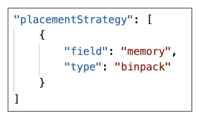

In [89]:
from PIL import Image 
from IPython.display import display

img = Image.open('binpack.jpeg')
new_image = img.resize((200, 120))
display(new_image)

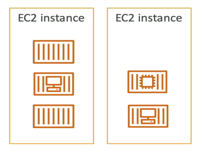

In [92]:
from PIL import Image 
from IPython.display import display

img = Image.open('binpack1.jpeg')
new_image = img.resize((200, 150))
display(new_image)

Random:
- places ECS tasks randomly on EC2 instances

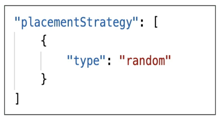

In [99]:
from PIL import Image 
from IPython.display import display

img = Image.open('random.jpeg')
new_image = img.resize((220, 120))
display(new_image)

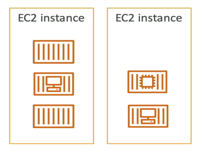

In [91]:
from PIL import Image 
from IPython.display import display

img = Image.open('binpack1.jpeg')
new_image = img.resize((200, 150))
display(new_image)

Spread:
- the tasks are allocated based on the spread policy
    - eg: filed value => ecs.availability-zone
        - then the tasks are allocated in AZ order

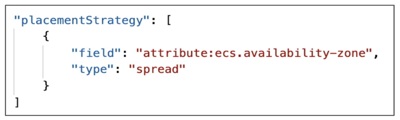

In [101]:
from PIL import Image 
from IPython.display import display

img = Image.open('spread.jpeg')
new_image = img.resize((400, 120))
display(new_image)

For example,
- Task 1 will be allocated to EC2 instance AZ-A and then the Task 2 will be allocated to EC2 instance AZ-B and then Task 3 will be allocated to EC2 instance AZ-C. likewise it will be repeated as shown in the below figure

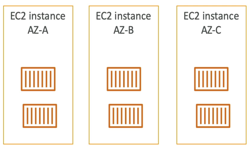

In [103]:
from PIL import Image 
from IPython.display import display

img = Image.open('spread1.jpeg')
new_image = img.resize((250, 150))
display(new_image)

We can also mix the placement strategies:

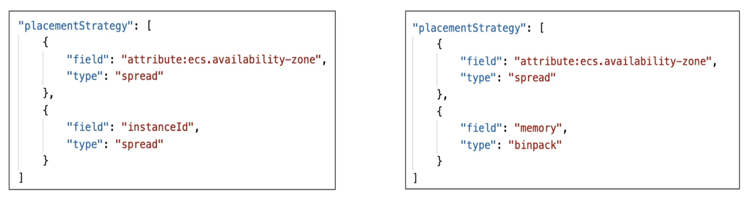

In [107]:
from PIL import Image 
from IPython.display import display

img = Image.open('mix.jpeg')
new_image = img.resize((750, 200))
display(new_image)

##### Task Placement Constraints:

distinctInstance:
- place each task on a different container instance

memberof:
- place each task on container instance based of cluster query language



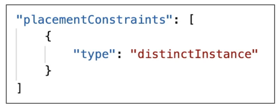

In [118]:
from PIL import Image 
from IPython.display import display

img = Image.open('distinctinstance.jpeg')
new_image = img.resize((280, 110))
display(new_image)

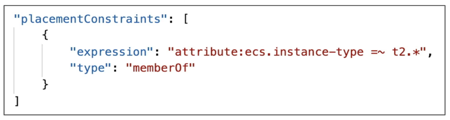

In [116]:
from PIL import Image 
from IPython.display import display

img = Image.open('memberof.jpeg')
new_image = img.resize((450, 120))
display(new_image)

### Amazon Elastic Container Registry (ECR):
- Store and manage docker images on AWS
- public and private repository
    - private:
        - repository available only to the user/team
    - public:
        - internal repository made available public via public gallery
- fully integrated with ECS, backed by Amazon S3.
- access controlled by IAM
- supports image vulnerability scanning, versioning, image tags, image lifecycle, etc.

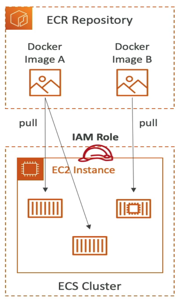

In [124]:
from PIL import Image 
from IPython.display import display

img = Image.open('ECR.jpeg')
new_image = img.resize((180, 300))
display(new_image)

#### Pull images from Amazon ECR using AWS CLI (Linux/Mac):
Before running the below commands, ensure docker is running on the system

Login command:
- AWS CLI v2
    - aws ecr get-login-password --region "region" | docker login --username AWS --password-stdin "aws_account_id.dkr.ecr.region.amazonaws.com"

Docker commands:
- Build:
    - docker build -t "image_name" (eg: image_name => nginxdemos/hello)
    
- Tag:    
    - docker tag "image_name:latest aws_account_id.dkr.ecr.region.amazonaws.com/repository_name:latest" (eg: image_name => nginxdemos/hello)

- Push:
    - docker push "aws_account_id.dkr.ecr.region.amazonaws.com/repository_name:latest"

- Pull:
    - docker pull "aws_account_id.dkr.ecr.region.amazonaws.com/repository_name:latest"

Note: 
- if EC2 instance unable to push/pull a docker image, check IAM permissions


#### Pull images from Amazon ECR using AWS CLI (Windows):
Before running the below commands, ensure docker is running on the system

Login command:
- (Get-ECRLoginCommand).Password | docker login --username AWS --password-stdin "aws_account_id.dkr.ecr.region.amazonaws.com"

Docker commands:
- Build:
    - docker build -t "image_name" (eg: image_name => nginxdemos/hello)

- Tag:
    - docker tag "image_name:latest aws_account_id.dkr.ecr.region.amazonaws.com/repository_name:latest" (eg: image_name => nginxdemos/hello)

- Push 
    - docker push "aws_account_id.dkr.ecr.region.amazonaws.com/repository_name:latest"

- Pull:
    - docker pull "aws_account_id.dkr.ecr.region.amazonaws.com/repository_name:latest"

Note: 
- if EC2 instance unable to push/pull a docker image, check IAM permissions

#### To create ECR Repository and push/pull docker images:
- Go to ECS service console, there are options on left-side such as task definition, Amazon ECR, Repositories
- Click on Repositories Option
    - Create Repository
        - Visible settings
            - Private
            - Public
        - Repository name
        - tag immutability
            - prevent image from being overwritten by subsequent pushes using the same tag
        - Image scanning on push (deprecated, instead use registry level scan filter)
            - if not enabled, then image scanning must be done manually
        - Encryption settings
            - KMS

#### AWS CoPilot:
- CLI tool used to build, release, operate production-ready containerized apps
- run apps on AppRunner, ECS, Fargate
- helps in building app rather than focusing on infrastructure
- provisions all required infrastructure for containerized apps (ECS, VPC, ELB, ECR)
- automated deployments with one command using Code Pipeline
- deploy to multiple environments
- troubleshooting, logs, health status, etc

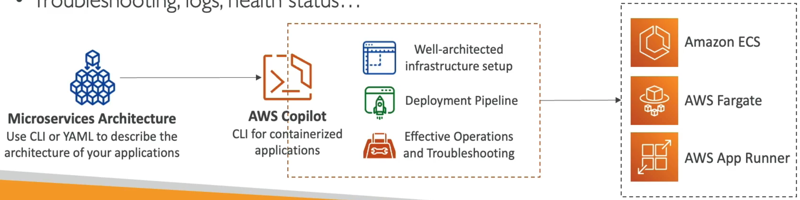

In [5]:
from PIL import Image 
from IPython.display import display

img = Image.open('copilot.jpeg')
new_image = img.resize((800, 200))
display(new_image)

#### AWS Co-Pilot

URL: https://aws.github.io/copilot-cli/docs/getting-started/first-app-tutorial/

Steps:
- Install Co-pilot from the above URL
- Make sure AWS CLI and Docker is also installed and running
- Follow the sample procedure from AWS Co-Pilot

Amazon EKS (Elastic Kubernetes Service):
- way to launch managed kubernetes clusters on AWS
- kubernetes is am open-source system for automatic deployments, scaling, management of containerized apps
- Alternative to ECS, similar goal but different APIs
- EKS also support EC2 (worker nodes) or Fargate (serverless) launch type

Here in EKS, instead of ECS tasks, we define them as EKS pods

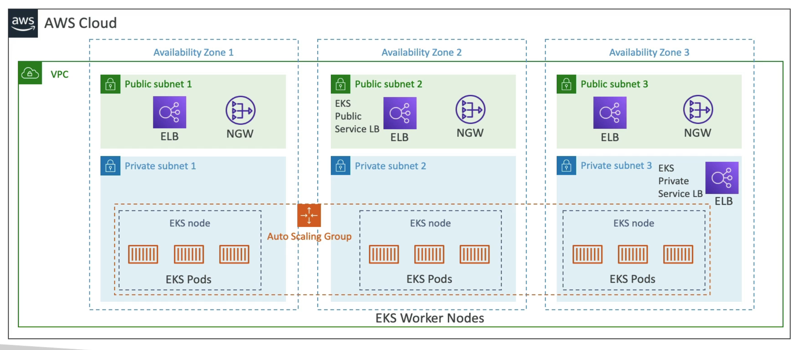

In [6]:
from PIL import Image 
from IPython.display import display

img = Image.open('EKS.jpeg')
new_image = img.resize((800, 350))
display(new_image)

#### EKS - Node Types:
Managed Node Groups:
- Creates and manages nodes (EC2 instances) for you
- Nodes are part of ASG managed by EKS
- supports on-demand or spot instances

Self Managed Nodes:
- Nodes created by you registered to EKS cluster and managed by ASG
- can use prebuilt AMI- Amazon EKS Optimized AMI
- supports on-demand or spot instances

AWS Fargate:
- None to manage and no nodes, serverless

#### Amazon EKS - Data Volumes:
- Need to specify storage class manifests on EKS cluster
- Leverages Container Storage Interface (CSI) complaint driver
- supports
    - EBS
    - EFS (works with Fargate)
    - Amazon FSx for Lustre
    - Amazon FSx for NetApp ONTAP